# アヤメの分類サンプル（SVM，ロジスティック回帰）

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
[d.shape for d in [iris.data, iris.target]]

[(150, 4), (150,)]

In [8]:
[iris.feature_names, iris.target_names]

[['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10')]

In [9]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [10]:
import matplotlib.pyplot as plt

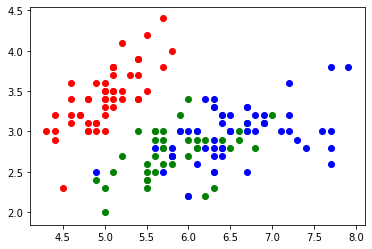

In [12]:
# 試しにプロット
plt.scatter(iris.data[:50, 0], iris.data[:50, 1], color='red', label='setosa')
plt.scatter(iris.data[50:100, 0], iris.data[50:100, 1], color='green', label='versicolor')
plt.scatter(iris.data[100:150, 0], iris.data[100:150, 1], color='blue', label='virginica')
plt.show()

In [13]:
X = iris.data
y = iris.target

In [14]:
n_train = len(X)//2
X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

In [17]:
from sklearn import svm

In [18]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
# 結果が良くない
clf.score(X_test, y_test)

0.3333333333333333

In [20]:
# データをシャッフルする
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(train_size=0.6, test_size=0.4, random_state=0)

In [24]:
train_index, test_index = next(ss.split(X))
X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

In [35]:
clf = svm.SVC(gamma=0.05)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
# よくなった
clf.score(X_test, y_test)

0.9

In [37]:
# 学習器を変更
from sklearn import linear_model
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9166666666666666